In [1]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.optimize import curve_fit
from datetime import datetime
from datetime import timedelta

from plotly.subplots import make_subplots
import plotly.graph_objects as go

#import ruptures as rpt
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
#from ruptures.base import BaseCost
from scipy.optimize import curve_fit#

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New Section

In [2]:
df=pd.read_excel("/daily data.xlsx")
df.head()

,Sum of kWh total,Average of wbt
0,289.036821,63.044850
1,316.529866,68.692033
2,310.562349,73.974504
3,311.418967,71.274783
4,313.531853,70.010379


In [3]:
def three_pc(x, m2, xcp1):#what we will be using
    """ Function to fit a 3PC model using numpy.
    Args:
        x (numpy.array): Independent variable.
        ycp (float): Y Intercept.
        m2 (float): Slope.
        xcp1 (float): Changepoint.
    Returns:
         Predicted dependent variable (numpy.array).
    """
    return(
    (x < xcp1) * (0) +
    (x >= xcp1) * (m2*(x - xcp1) + 0))

In [ ]:
def four_p(x, ycp, m1, m2, xcp1):
    """ Function to fit a 4P model using numpy.
    Args:
        x (numpy.array): Independent variable.
        ycp (float): Y Intercept.
        m1 (float): Left slope.
        m2 (float): Right slope.
        xcp1 (float): Changepoint.
    Returns:
         Predicted dependent variable (numpy.array).
    """
    return(
    (x < xcp1) * (m1*(x-xcp1) + ycp) +
    (x >= xcp1) * (m2*(x - xcp1) + ycp))

In [4]:
def two_change(x,m1,xcp1,xcp2):
  # sol=0
  # if x<xcp1:
  #   sol=ycp
  # else:
  #   if x<xcp2:
  #     sol=(m1*(x - xcp1) + ycp
    
  #   if x>xcp2:
  #     sol=m1*(xcp2-xcp1)+ycp
  # return sol

  return(
      (x<xcp1)*0+
      ((xcp1<=x) & (x<xcp2))*((m1*(x - xcp1)+0 ))+
      (x>=xcp2)*(m1*(xcp2-xcp1)+0)
  )

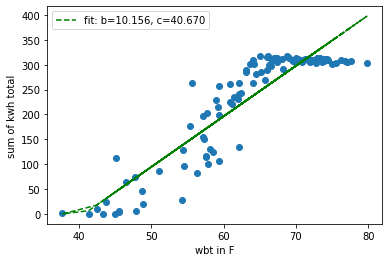

array([[0.2112974 , 0.47951281],
       [0.47951281, 1.2624206 ]])

In [5]:
temp=df['Average of wbt']
temp=temp.to_numpy()
pkwh=df['Sum of kWh total']
pkwh=pkwh.to_numpy()

popt, pcov= curve_fit(three_pc, temp, pkwh)
#model type is 3pc you define previously, do not need to put in any parameter
plt.plot(temp, three_pc(temp, *popt), 'g--',
         label='fit: b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(temp,pkwh)
plt.xlabel("wbt in F")
plt.ylabel("sum of kwh total")
plt.legend()
plt.show()

pcov

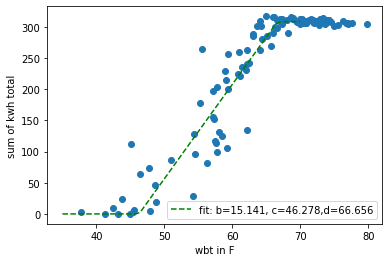

array([[ 0.71598473,  0.6220248 , -0.34159581],
       [ 0.6220248 ,  0.62942724, -0.20773576],
       [-0.34159581, -0.20773576,  0.34861597]])

In [6]:
popt1, pcov1= curve_fit(two_change, temp, pkwh,p0=np.array([10,41,65]))
plt.plot(np.linspace(35,70), two_change(np.linspace(35,70), *popt1), 'g--',
         label='fit: b=%5.3f, c=%5.3f,d=%5.3f' % tuple(popt1))
plt.scatter(temp,pkwh)
plt.xlabel("wbt in F")
plt.ylabel("sum of kwh total")
plt.legend()
plt.show()

pcov1



In [ ]:
# h2=df['hours T2']
# h2=h2.to_numpy()

# popt1, pcov1= curve_fit(three_pc, temp, h2,p0=np.array([0.437,0.022,41]))
# plt.plot(temp, three_pc(temp, *popt1), 'g--',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.scatter(temp,h2)
# plt.xlabel("wbt in F")
# plt.ylabel("hours t2")
# plt.legend()
# plt.show()

# pcov1